In [25]:
!pip3 install lifelines

In [26]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
from lifelines import KaplanMeierFitter  # Importing Kaplan-Meier estimator from lifelines
from lifelines.statistics import logrank_test  # Importing log-rank test for survival comparison


In [3]:
from google.colab import files
uploaded=files.upload()

Saving GBM_patient_data.csv to GBM_patient_data.csv


In [4]:
pd_data=pd.read_csv('/content/GBM_patient_data.csv')
pd_data.head()

,age (years),"sex (0=Female, 1=Male)","MGMT_promotor_methylated (0=WT, 1=Methylated)","IDH_mutant (0=WT, 1=Mutant)","treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)","event (1=event occurred, 0=censored)",survival_time (days)
0,64.967142,0,0,1,0,1,194.181664
1,58.617357,0,0,0,0,1,73.346847
2,66.476885,1,0,0,1,1,360.114365
3,75.230299,1,0,1,1,1,219.539143
4,57.658466,0,1,0,0,0,516.734029


In [31]:
# drop 'MGMT_promotor_methylated (0=WT, 1=Methylated)' column
pd_data=pd_data.drop(columns=['MGMT_promotor_methylated (0=WT, 1=Methylated)'])
pd_data.head()

,age (years),"sex (0=Female, 1=Male)","IDH_mutant (0=WT, 1=Mutant)","treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)","event (1=event occurred, 0=censored)",survival_time (days)
0,64.967142,0,1,0,1,194.181664
1,58.617357,0,0,0,1,73.346847
2,66.476885,1,0,1,1,360.114365
3,75.230299,1,1,1,1,219.539143
4,57.658466,0,0,0,0,516.734029


In [37]:
# pd_data_0=pd_data[pd_data['treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)']==0 and pd_data['MGMT_promotor_methylated (0=WT, 1=Methylated)']==0]
# pd_data_1=pd_data[pd_data['treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)']==1 and pd_data['MGMT_promotor_methylated (0=WT, 1=Methylated)']==0]
# pd_data_0.head()
# # pd_data_1.head()

# Filter for patients with unmethylated MGMT and treatments 1 or 2.
# drop column

df_subset = pd_data[pd_data['treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)'].isin([1, 2])].copy()
df_subset.head()


,age (years),"sex (0=Female, 1=Male)","IDH_mutant (0=WT, 1=Mutant)","treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)","event (1=event occurred, 0=censored)",survival_time (days)
2,66.476885,1,0,1,1,360.114365
3,75.230299,1,1,1,1,219.539143
5,57.658630,1,1,2,1,582.464337
6,75.792128,0,0,2,0,320.019037
7,67.674347,1,0,1,0,379.813096


In [38]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(
    df_subset,
    duration_col='survival_time (days)',
    event_col='event (1=event occurred, 0=censored)',
    # step_size=0.1,
    # fit_options={'step_size': 0.5, 'newton_options': {'maxiter': 1000}},  # Pass maxiter within newton_options
    show_progress=True
)
cph.print_summary()

Iteration 1: norm_delta = 4.95e-01, step_size = 0.9500, log_lik = -2747.25022, newton_decrement = 4.62e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.80e-02, step_size = 0.9500, log_lik = -2702.09784, newton_decrement = 7.57e-02, seconds_since_start = 0.0
Iteration 3: norm_delta = 9.72e-04, step_size = 0.9500, log_lik = -2702.02212, newton_decrement = 2.19e-04, seconds_since_start = 0.1
Iteration 4: norm_delta = 2.26e-07, step_size = 1.0000, log_lik = -2702.02190, newton_decrement = 1.18e-11, seconds_since_start = 0.1
Convergence success after 4 iterations.


<lifelines.CoxPHFitter: fitted with 699 total observations, 207 right-censored observations>
             duration col = 'survival_time (days)'
                event col = 'event (1=event occurred, 0=censored)'
      baseline estimation = breslow
   number of observations = 699
number of events observed = 492
   partial log-likelihood = -2702.02
         time fit was run = 2025-03-21 06:55:06 UTC

---
                                                             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                                    
age (years)                                                  0.03      1.03      0.00            0.02            0.04                1.02                1.04
sex (0=Female, 1=Male)                                       0.02      1.02      0.09           -0.16            0.20                0.85                1.22
IDH_mutant (0=WT, 1=Mutant)                                 -0.56      0.57      0.10           -0.75           -0.37                0.47                0.69
treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ) -0.58      0.56      0.09           -0.77           -0.40                0.46                0.67

                                                             cmp to     z      p  -log2(p)
covariate                                                                                 
age (years)                                                    0.00  5.65 <0.005     25.89
sex (0=Female, 1=Male)                                         0.00  0.20   0.84      0.25
IDH_mutant (0=WT, 1=Mutant)                                    0.00 -5.75 <0.005     26.70
treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)    0.00 -6.23 <0.005     31.00
---
Concordance = 0.63
Partial AIC = 5412.04
log-likelihood ratio test = 90.46 on 4 df
-log2(p) of ll-ratio test = 59.72

In [39]:
average_age=pd_data['age (years)'].mean()
tmz_alone={
    'treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)':1,
    'age (years)':average_age,
    'sex (0=Female, 1=Male)':1, # male as reference
    'MGMT_promotor_methylated (0=WT, 1=Methylated)':0,
'IDH_mutant (0=WT, 1=Mutant)':0
}

tmz_mi1={
    'treatment (0=TMZ-untreated, 1=TMZ-treated alone, 2=Mi1+TMZ)':2,
    'age (years)':average_age,
    'sex (0=Female, 1=Male)':1,
    'MGMT_promotor_methylated (0=WT, 1=Methylated)':0,
'IDH_mutant (0=WT, 1=Mutant)':0


}

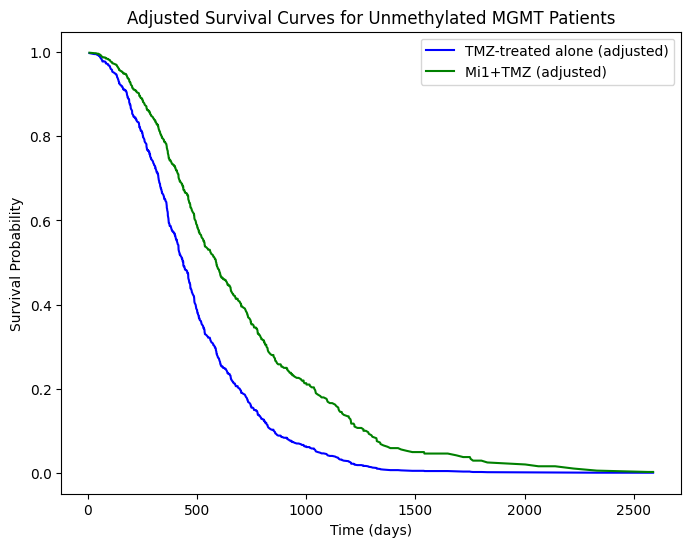

In [41]:
## plot cox model curves

df_profile_Tmz = pd.DataFrame([tmz_alone])
df_profile_Mi1 = pd.DataFrame([tmz_mi1])

# Predicting survival functions
surv_T = cph.predict_survival_function(df_profile_Tmz)
surv_Mi1 = cph.predict_survival_function(df_profile_Mi1)

# Plot of the adjusted survival curves
plt.figure(figsize=(8,6))
plt.plot(surv_T.index, surv_T.iloc[:, 0], label='TMZ-treated alone (adjusted)', color='blue')
plt.plot(surv_Mi1.index, surv_Mi1.iloc[:, 0], label='Mi1+TMZ (adjusted)', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.title('Adjusted Survival Curves for Unmethylated MGMT Patients')
plt.legend()
plt.show()